In [ ]:
!pip install tensorflow

In [ ]:
!pip install opencv-python

In [1]:
import tensorflow as tf
import os

In [2]:
gpus= tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

# Remove Dogy Images

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import cv2
import imghdr

In [7]:
data_dir='/content/drive/MyDrive/FunctionUpAssignment/Deep Learning/Live2/happsad/data'
image_exits=['jpeg','jpg','bmp','png']

In [8]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path) #image extension
      if tip not in image_exits:
        print("Image doest not exist: {}".formate(image_path))
        os.remove(image_path)
    except Exception as e:
      print("Issuse the Image: {}".formate(image_path))
      os.remove(image_path)


#Load Data

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.utils import image_dataset_from_directory

In [10]:
#Read the data
data =image_dataset_from_directory(data_dir)

Found 305 files belonging to 2 classes.


In [11]:
# use numpy because image is metrix
data_iterator= data.as_numpy_iterator()

In [12]:
#batch use for get data again and again different
batch =data_iterator.next()

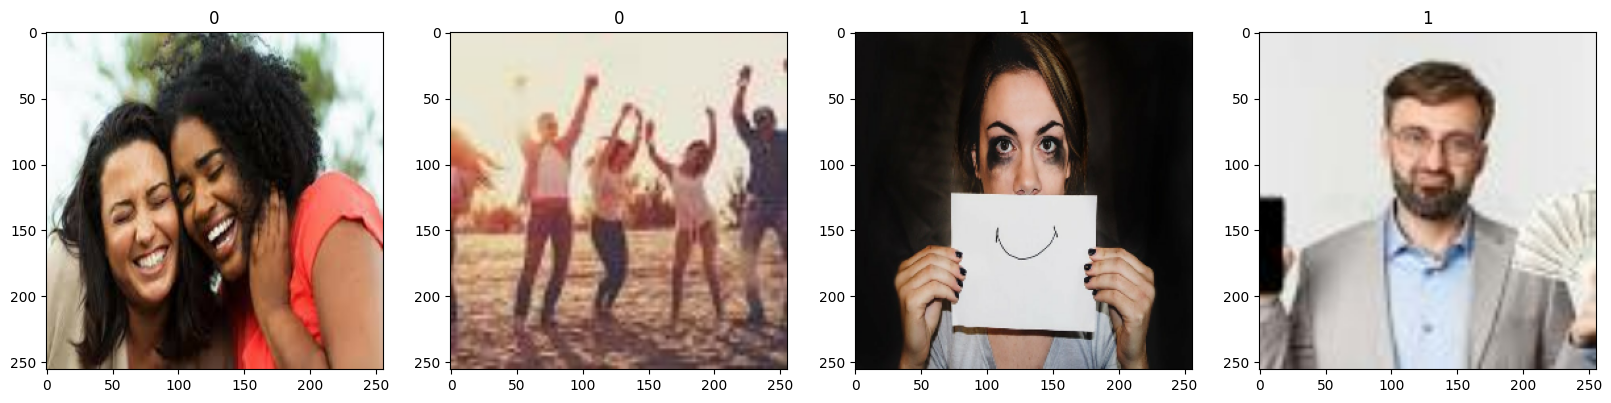

In [13]:
#how many images you want ncols is number of image and figsize is dimension happy :0 , sad:1
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])


# Data Scaling the data

In [14]:
data=data.map(lambda x,y:(x/255,y))

# Train and Test Split

In [15]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)

In [16]:
train =data.take(train_size)
val = data.skip(train_size).take(val_size)
test =data.skip(train_size+val_size).take(test_size)

# Build CNN Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten

In [18]:
model=Sequential()

In [19]:
# Conv2D(filtter,(dimension,),strides, activaion='relu' , input_shape=(dimension,dimension, rgb))
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
# This line adds a max-pooling layer to the model, which reduces the spatial dimensions of the input volume.
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
# ANN method
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


#Compile the model

In [20]:
# Adam is activaion function
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [22]:
hist = model.fit(train,epochs=30,validation_data=val)

Epoch 1/30
7/7 [==============================] - 28s 3s/step - loss: 0.7001 - accuracy: 0.5670 - val_loss: 0.6583 - val_accuracy: 0.6719
Epoch 2/30
7/7 [==============================] - 20s 2s/step - loss: 0.6478 - accuracy: 0.6607 - val_loss: 0.5605 - val_accuracy: 0.8281
Epoch 3/30
7/7 [==============================] - 20s 2s/step - loss: 0.5870 - accuracy: 0.7277 - val_loss: 0.5406 - val_accuracy: 0.7188
Epoch 4/30
7/7 [==============================] - 21s 3s/step - loss: 0.5318 - accuracy: 0.7411 - val_loss: 0.5724 - val_accuracy: 0.7812
Epoch 5/30
7/7 [==============================] - 21s 2s/step - loss: 0.4745 - accuracy: 0.7812 - val_loss: 0.4382 - val_accuracy: 0.7656
Epoch 6/30
7/7 [==============================] - 20s 2s/step - loss: 0.4226 - accuracy: 0.8214 - val_loss: 0.3901 - val_accuracy: 0.8125
Epoch 7/30
7/7 [==============================] - 21s 2s/step - loss: 0.3584 - accuracy: 0.8259 - val_loss: 0.4595 - val_accuracy: 0.7812
Epoch 8/30
7/7 [==================

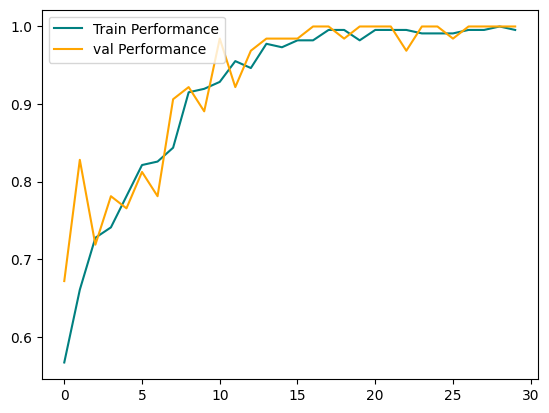

In [23]:
fig =plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='Train Performance')
plt.plot(hist.history['val_accuracy'],color='orange',label='val Performance')
plt.legend(loc='upper left')
plt.show()


# Model Test

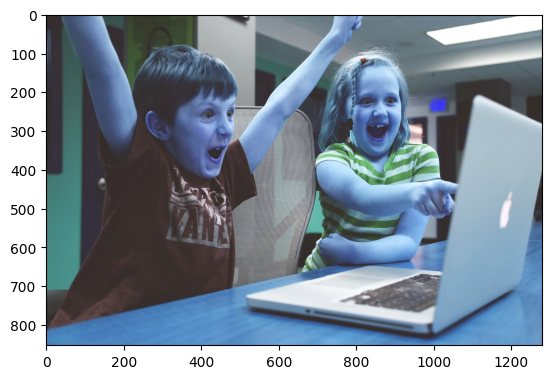

In [33]:
img=cv2.imread('happy.jpg')
plt.imshow(img)
plt.show()

#resize the Image

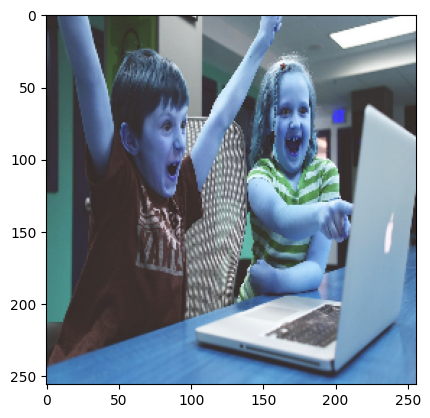

In [34]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [35]:
y_pred=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 33ms/step


In [36]:
y_pred

array([[0.0290947]], dtype=float32)

In [37]:
if y_pred>0.5:
  print("Sad")
else:
  print("Happy")

Happy


# Model Save

In [40]:
from tensorflow.keras.models import load_model
model.save('image_classification.h5')
model.save(os.path.join('model','image_classification.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
new_model=load_model('image_classification.h5')

In [42]:
output= new_model.predict(np.expand_dims(resize/255,0))
if output>0.5:
  print("Sad")
else:
  print("Happy")

1/1 [==============================] - 0s 188ms/step
Happy


In [43]:
output

array([[0.0290947]], dtype=float32)